In [1]:
import pandas as pd
import numpy as np

import os

from sklearn import linear_model, cross_validation, grid_search
from sklearn.tree import DecisionTreeClassifier

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import  cross_val_score

In [2]:
#1. Get Data
col_names = ['Nbr_Pregnant','Plasma_Glucose','BP','Skin','Insulin','BMI','Pedigree','Age','Target']

diabetes_df = pd.read_csv('/home/shenbaga/data-files/pima-indians-diabetes.data', names=col_names)

In [3]:
diabetes_df.head()

,Nbr_Pregnant,Plasma_Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df.describe()

,Nbr_Pregnant,Plasma_Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Nbr_Pregnant      768 non-null int64
Plasma_Glucose    768 non-null int64
BP                768 non-null int64
Skin              768 non-null int64
Insulin           768 non-null int64
BMI               768 non-null float64
Pedigree          768 non-null float64
Age               768 non-null int64
Target            768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
import seaborn as sns

In [6]:
%matplotlib inline

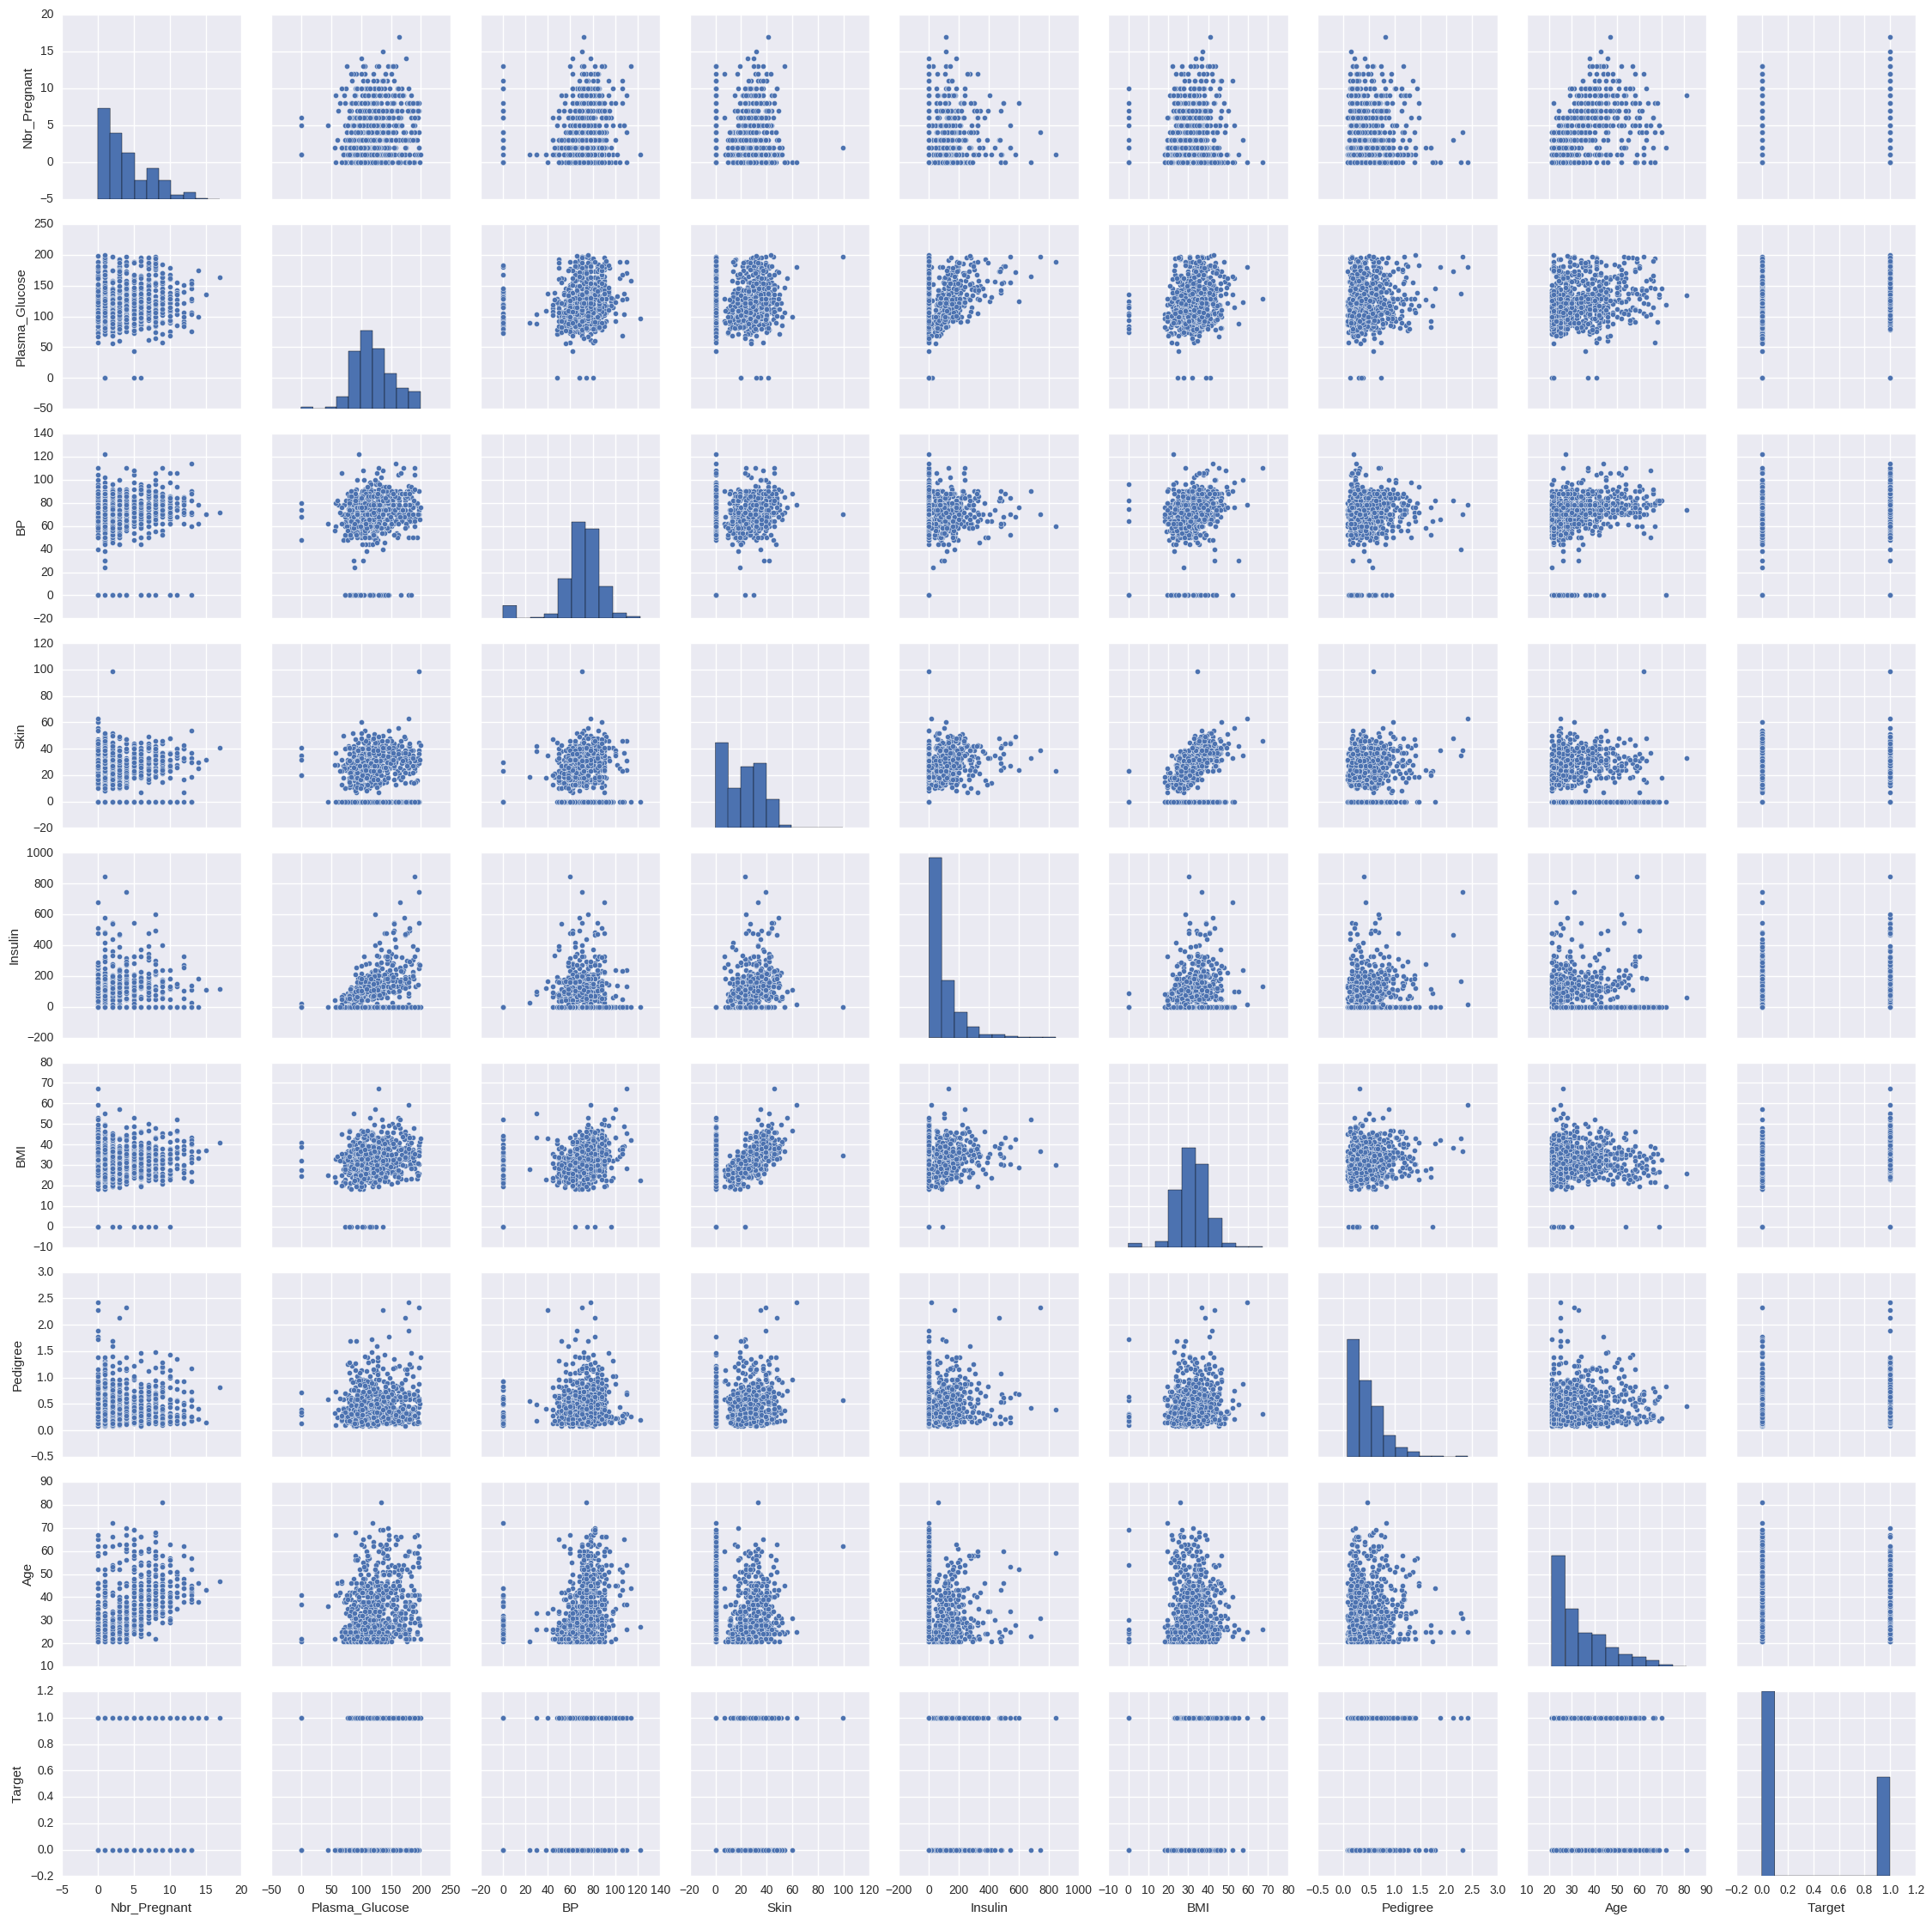

In [7]:
sns.pairplot(data=diabetes_df)

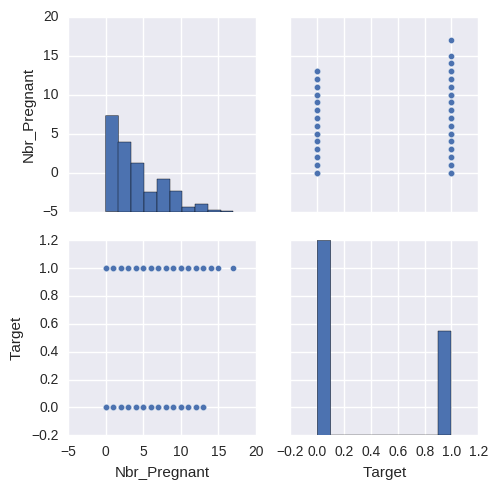

In [8]:
#let's plot each Var against Target and see the relationship
sns.pairplot(diabetes_df[['Nbr_Pregnant','Target']])

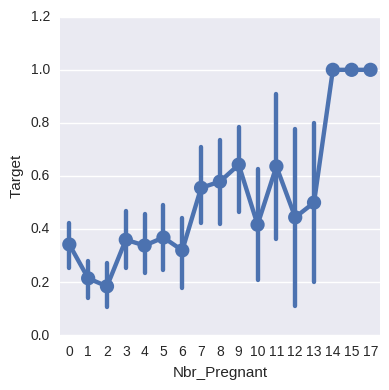

In [12]:
sns.factorplot(data=diabetes_df, x='Nbr_Pregnant', y='Target')

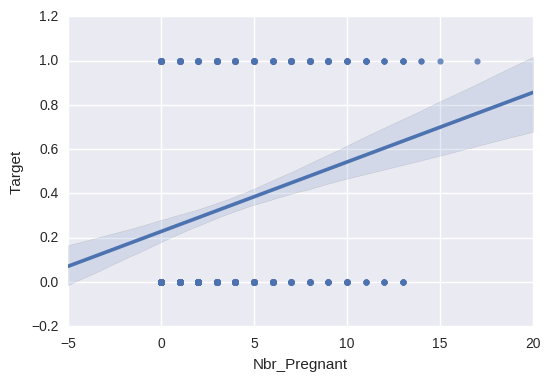

In [9]:
sns.regplot(data=diabetes_df, x='Nbr_Pregnant', y='Target')

In [10]:
import matplotlib.pyplot as plt

In [11]:
diabetes_df.groupby(['Nbr_Pregnant', 'Target'])[['BMI']].count()

BMI
Nbr_Pregnant Target     
0            0        73
             1        38
1            0       106
             1        29
2            0        84
             1        19
3            0        48
             1        27
4            0        45
             1        23
5            0        36
             1        21
6            0        34
             1        16
7            0        20
             1        25
8            0        16
             1        22
9            0        10
             1        18
10           0        14
             1        10
11           0         4
             1         7
12           0         5
             1         4
13           0         5
             1         5
14           1         2
15           1         1
17           1         1

# from all charts above, we can say that there is a slight positive correlation  between Nbr_Pregnant and the Target

# also, looks like we need not do any treatment on this column as the values look reasonable

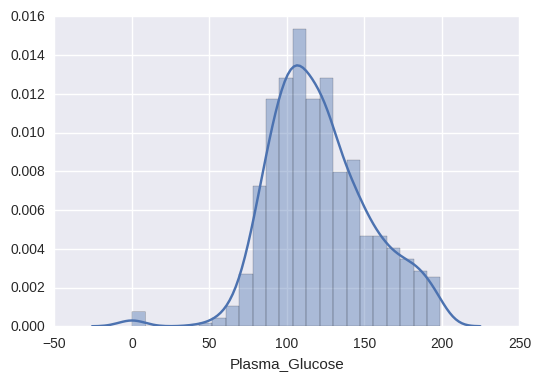

In [12]:
#look at next column - Plasma_Glucose
sns.distplot(diabetes_df['Plasma_Glucose'])

# data looks kinda normally distributed

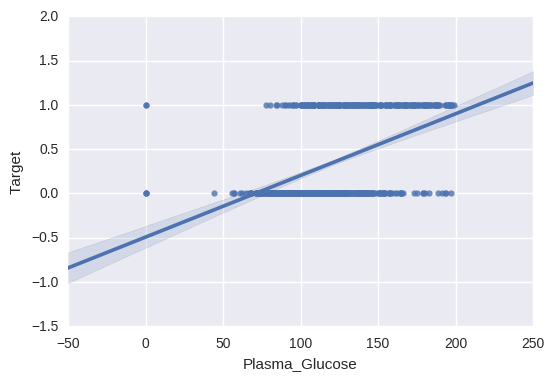

In [13]:
sns.regplot(data=diabetes_df, x='Plasma_Glucose', y='Target')

# I am not sure if it is correct to do a scatter/reg plot for above data set as Target is a binary variable

# need to see if there is a better way to show it

# factor plot could be one

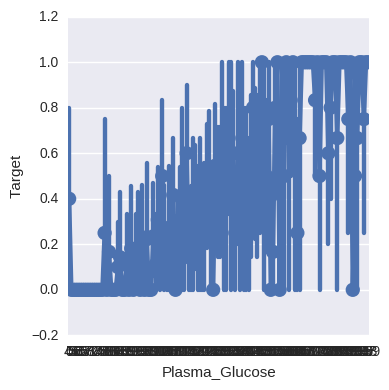

In [22]:
sns.factorplot(data=diabetes_df, x = 'Plasma_Glucose', y = 'Target')

# 

In [14]:
diabetes_df.columns

Index([u'Nbr_Pregnant', u'Plasma_Glucose', u'BP', u'Skin', u'Insulin', u'BMI',
       u'Pedigree', u'Age', u'Target'],
      dtype='object')

In [15]:
#add decile columns to Plasma_Glucose to see how Target varies with the decile groups
diabetes_df['Plasma_Glucose_Decl'] = pd.qcut(diabetes_df['Plasma_Glucose'], 10)

In [16]:
diabetes_df.head()

,Nbr_Pregnant,Plasma_Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Target,Plasma_Glucose_Decl
0,6,148,72,35,0,33.6,0.627,50,1,"(147, 167]"
1,1,85,66,29,0,26.6,0.351,31,0,"[0, 85]"
2,8,183,64,0,0,23.3,0.672,32,1,"(167, 199]"
3,1,89,66,23,94,28.1,0.167,21,0,"(85, 95]"
4,0,137,40,35,168,43.1,2.288,33,1,"(134, 147]"


In [17]:
diabetes_df['Plasma_Glucose_Decl'].unique()

[(147, 167], [0, 85], (167, 199], (85, 95], (134, 147], (109, 117], (117, 125], (95, 102], (102, 109], (125, 134]]
Categories (10, object): [[0, 85] < (85, 95] < (95, 102] < (102, 109] ... (125, 134] < (134, 147] < (147, 167] < (167, 199]]

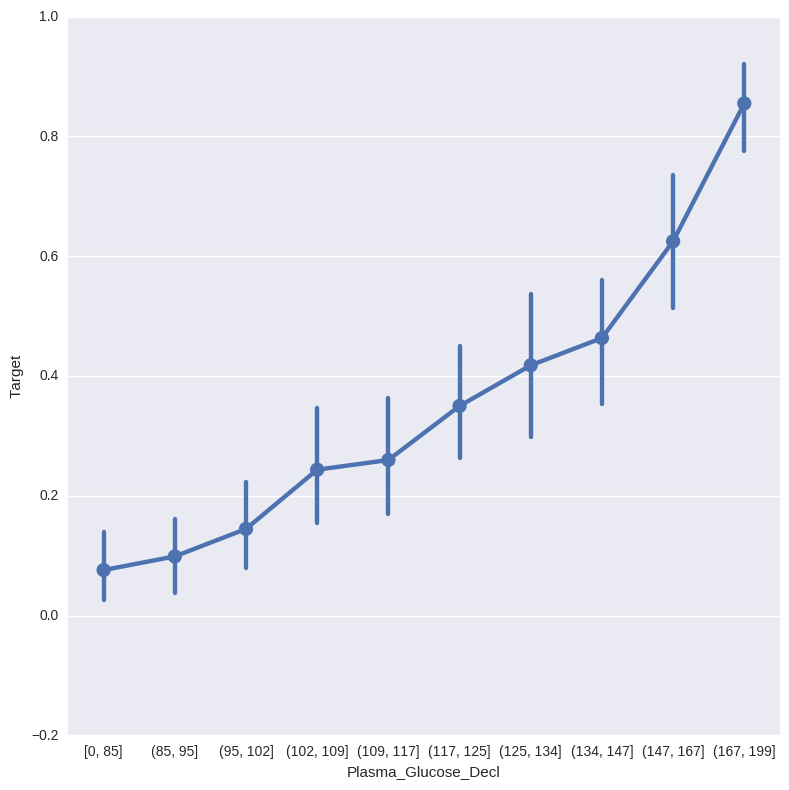

In [18]:
sns.factorplot(data=diabetes_df, x= 'Plasma_Glucose_Decl', y= 'Target', size=8)

# from above, we can clearly see that with increase in plasma glucose value, the incidence of diabetes (Target) also increases - almost linearly

/home/shenbaga/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


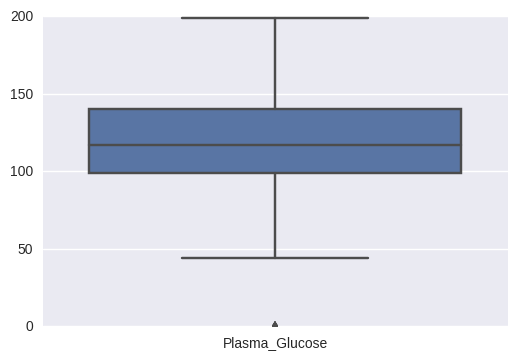

In [19]:
#see if there are outliers in the plasma glucose field
sns.boxplot(diabetes_df[['Plasma_Glucose']])

In [20]:
#26 Nov 2016
#from above we see that there are not a lot of outliers in Plasma_Glucose

In [21]:
diabetes_df.columns

Index([u'Nbr_Pregnant', u'Plasma_Glucose', u'BP', u'Skin', u'Insulin', u'BMI',
       u'Pedigree', u'Age', u'Target', u'Plasma_Glucose_Decl'],
      dtype='object')

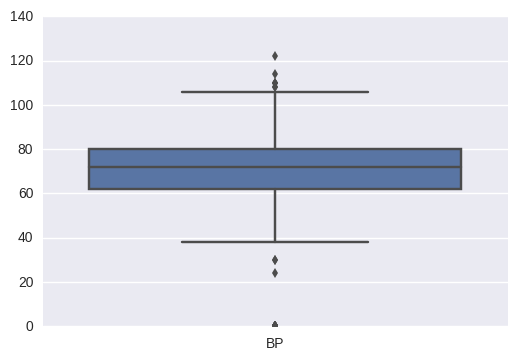

In [22]:
sns.boxplot(diabetes_df[['BP']])

In [23]:
diabetes_df['BP_Decl'] = pd.qcut(diabetes_df['BP'], 10)

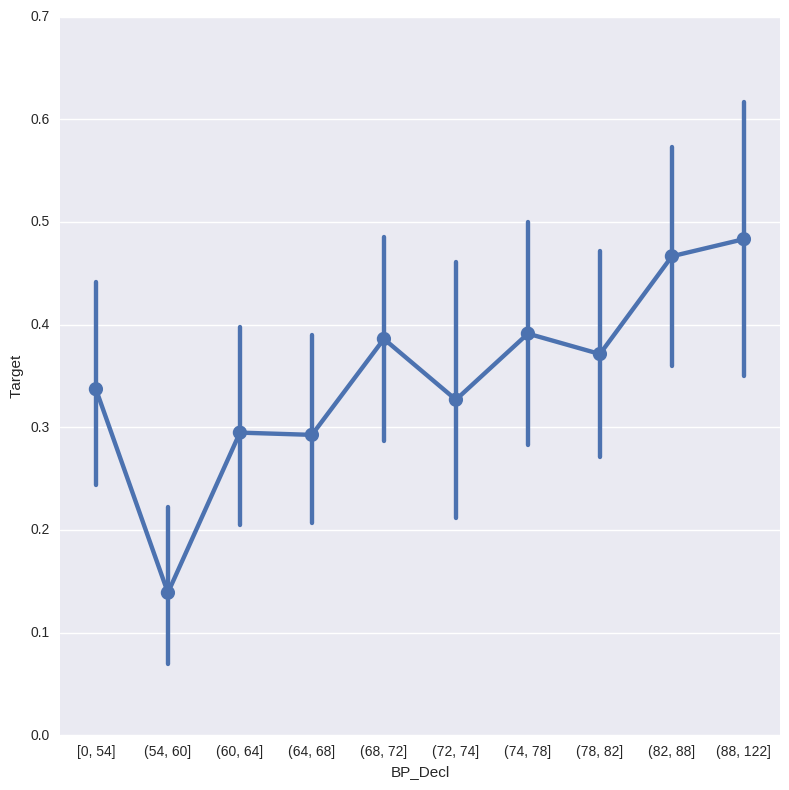

In [24]:
sns.factorplot(data=diabetes_df, x='BP_Decl', y='Target', size=8)

In [41]:
#similar trend for BP as well
# am guessing no need for outliers

In [25]:
len(diabetes_df)

768

In [26]:
train = diabetes_df.sample(frac=0.8,random_state=200)
test = diabetes_df.drop(train.index)

In [27]:
train.head()

,Nbr_Pregnant,Plasma_Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Target,Plasma_Glucose_Decl,BP_Decl
355,9,165,88,0,0,30.4,0.302,49,1,"(147, 167]","(82, 88]"
667,10,111,70,27,0,27.5,0.141,40,1,"(109, 117]","(68, 72]"
390,1,100,66,29,196,32.0,0.444,42,0,"(95, 102]","(64, 68]"
356,1,125,50,40,167,33.3,0.962,28,1,"(117, 125]","[0, 54]"
269,2,146,0,0,0,27.5,0.240,28,1,"(134, 147]","[0, 54]"


In [28]:
#3. Split into features and target
X_train = train[['Nbr_Pregnant','Plasma_Glucose','BP','Skin','Insulin','BMI','Pedigree','Age']]
X_test = test[['Nbr_Pregnant','Plasma_Glucose','BP','Skin','Insulin','BMI','Pedigree','Age']]

y_train = train['Target'].values
y_test = test['Target'].values

In [29]:
X_train.head()

,Nbr_Pregnant,Plasma_Glucose,BP,Skin,Insulin,BMI,Pedigree,Age
355,9,165,88,0,0,30.4,0.302,49
667,10,111,70,27,0,27.5,0.141,40
390,1,100,66,29,196,32.0,0.444,42
356,1,125,50,40,167,33.3,0.962,28
269,2,146,0,0,0,27.5,0.240,28


In [30]:
# so far we have seen the performance of the simple decision tree
# next we move on to a Cross Validated Decision Tree
#5. Build a 10 fold CV Dtree

In [31]:
CV_Decision_Tree = DecisionTreeClassifier(min_samples_split=20, random_state=99)
CV_Decision_Tree_result = cross_validation.cross_val_score(CV_Decision_Tree, X_train, y_train, cv=10)

In [32]:
print CV_Decision_Tree_result.mean(), CV_Decision_Tree_result.std()

0.74126984127 0.0570983155685


In [33]:
#cross validation by itself is not a method to provide a better Decision Tree
# so we move on to GridSearchCV

In [34]:
# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [35]:
#a simple dt to start off with
dt = DecisionTreeClassifier()

In [36]:
grid_search_DT = GridSearchCV(dt, param_grid=param_grid, cv=10)

In [37]:
#we do the grid search first and then do the fit
grid_search_DT.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 10, 20], 'max_leaf_nodes': [None, 5, 10, 20], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 5, 10], 'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [38]:
type(grid_search_DT)

sklearn.grid_search.GridSearchCV

In [39]:
grid_search_DT.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [40]:
#the above would give the best params to be used for the decision tree
#build a decision tree using those params

In [41]:
Best_Grid_Search_DT = DecisionTreeClassifier(**grid_search_DT.best_params_)

In [42]:
#fit the train data to the above decision tree
Best_Grid_Search_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [44]:
#train accuracy:
Best_Grid_Search_DT.score(X_train, y_train)

0.83224755700325737

In [45]:
from sklearn import metrics

In [46]:
#test accuracy:
grid_search_predicted = Best_Grid_Search_DT.predict(X_test)
grid_search_actual = y_test

print(metrics.classification_report(grid_search_actual, grid_search_predicted))

             precision    recall  f1-score   support

          0       0.71      0.78      0.75        88
          1       0.67      0.58      0.62        66

avg / total       0.69      0.69      0.69       154



In [47]:
print(metrics.confusion_matrix(grid_search_actual, grid_search_predicted))

[[69 19]
 [28 38]]


In [48]:
#try with logistic regression

In [49]:
from sklearn import linear_model

In [50]:
log_reg = linear_model.LogisticRegression()

In [52]:
log_reg_CV = cross_val_score(log_reg, X_train, y_train)

In [53]:
log_reg_CV.mean(), log_reg_CV.std()

(0.75723396154578337, 0.024935799330007884)

In [54]:
param_grid_log_reg = {"C": [0.1, 1, 10, 100, 1000]}

In [55]:
log_reg2 = linear_model.LogisticRegression()

In [56]:
grid_search_log_reg = GridSearchCV(log_reg2, param_grid=param_grid_log_reg, cv=10)

In [57]:
#we do the grid search first and then do the fit
grid_search_log_reg.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [58]:
Best_Grid_Search_log_reg = linear_model.LogisticRegression(**grid_search_log_reg.best_params_)

In [59]:
Best_Grid_Search_log_reg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
Best_Grid_Search_log_reg.score(X_train, y_train)

0.79641693811074921

In [61]:
predicted_log_reg = Best_Grid_Search_log_reg.predict(X_test)

In [62]:
actual_log_reg = y_test

In [63]:
metrics.confusion_matrix(actual_log_reg, predicted_log_reg)

array([[77, 11],
       [32, 34]])

In [64]:
#take a look back at the DT conf matrix
print(metrics.confusion_matrix(grid_search_actual, grid_search_predicted))

[[69 19]
 [28 38]]


In [65]:
Best_Grid_Search_log_reg.score(X_test,y_test)

0.72077922077922074

In [66]:
Best_Grid_Search_DT.score(X_test, y_test)

0.69480519480519476

In [67]:
%matplotlib inline

In [68]:
DT_conf_matrix = metrics.confusion_matrix(grid_search_actual, grid_search_predicted)

In [69]:
Log_Reg_conf_matrix = metrics.confusion_matrix(actual_log_reg, predicted_log_reg)

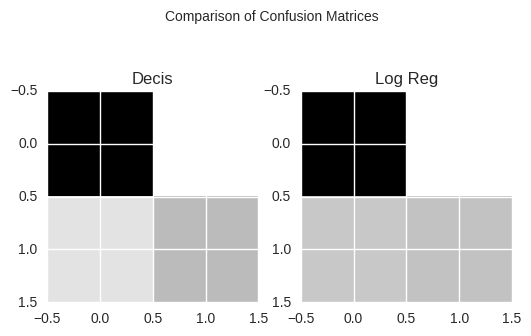

In [70]:
fig = plt.figure()
fig.suptitle("Comparison of Confusion Matrices", fontsize=10)

ax = plt.subplot("121")
ax.set_title("Decis")
ax.imshow(DT_conf_matrix, interpolation='none')

ax = plt.subplot("122")
ax.set_title("Log Reg")
ax.imshow(Log_Reg_conf_matrix, interpolation='none')

plt.show()

In [71]:
#27 nov 2016;
# do XGBoost in this data

In [72]:
import xgboost

ImportError: No module named xgboost